In [1]:
tickers = ['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BPCL.NS','BHARTIARTL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DIVISLAB.NS','DRREDDY.NS','EICHERMOT.NS','GRASIM.NS','HCLTECH.NS','HDFCBANK.NS','HDFCLIFE.NS','HEROMOTOCO.NS','HINDALCO.NS','HINDUNILVR.NS','HDFC.NS','ICICIBANK.NS','ITC.NS','IOC.NS','INFY.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS','NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS','RELIANCE.NS','SBILIFE.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS','TCS.NS','TATACONSUM.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','UPL.NS','ULTRACEMCO.NS','WIPRO.NS']

In [12]:
import yfinance as yf
import pandas as pd

In [13]:
stock = yf.Ticker(tickers[1])

In [22]:
# df = data.history(period="max")
df = pd.read_csv(f"ticker_data/{tickers[0]}.csv")

In [23]:
df

,Open,High,Low,Close,Volume,PrevHigh,PrevLow,PrevClose,PrevVolume
0,177.284893,180.757486,159.857964,161.749619,21958915,189.164755,140.731267,175.274399,27262365.0
1,165.404971,167.049885,153.945428,162.115143,25616715,180.757486,159.857964,161.749619,21958915.0
2,162.663431,174.908875,162.663431,169.791382,23047035,167.049885,153.945428,162.115143,25616715.0
3,171.756123,181.726115,168.511990,179.112534,14578850,174.908875,162.663431,169.791382,23047035.0
4,180.346213,192.820115,178.381450,191.723511,22742860,181.726115,168.511990,179.112534,14578850.0
...,...,...,...,...,...,...,...,...,...
4015,1210.000000,1276.000000,1195.699951,1267.849976,7195603,1308.000000,1188.099976,1209.550049,8670336.0
4016,1273.800049,1288.849976,1256.650024,1283.000000,4024586,1276.000000,1195.699951,1267.849976,7195603.0
4017,1250.000000,1270.050049,1227.250000,1266.599976,4858444,1288.849976,1256.650024,1283.000000,4024586.0
4018,1271.050049,1272.849976,1237.250000,1241.199951,2311324,1270.050049,1227.250000,1266.599976,4858444.0


In [24]:
df = df[1:]
df

,Open,High,Low,Close,Volume,PrevHigh,PrevLow,PrevClose,PrevVolume
1,165.404971,167.049885,153.945428,162.115143,25616715,180.757486,159.857964,161.749619,21958915.0
2,162.663431,174.908875,162.663431,169.791382,23047035,167.049885,153.945428,162.115143,25616715.0
3,171.756123,181.726115,168.511990,179.112534,14578850,174.908875,162.663431,169.791382,23047035.0
4,180.346213,192.820115,178.381450,191.723511,22742860,181.726115,168.511990,179.112534,14578850.0
5,191.906325,200.861957,191.906325,198.120438,13806600,192.820115,178.381450,191.723511,22742860.0
...,...,...,...,...,...,...,...,...,...
4015,1210.000000,1276.000000,1195.699951,1267.849976,7195603,1308.000000,1188.099976,1209.550049,8670336.0
4016,1273.800049,1288.849976,1256.650024,1283.000000,4024586,1276.000000,1195.699951,1267.849976,7195603.0
4017,1250.000000,1270.050049,1227.250000,1266.599976,4858444,1288.849976,1256.650024,1283.000000,4024586.0
4018,1271.050049,1272.849976,1237.250000,1241.199951,2311324,1270.050049,1227.250000,1266.599976,4858444.0


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X = df[['Open', 'PrevHigh', 'PrevLow', 'PrevClose', 'PrevVolume']]
y = df['Close']
trees, errors = [], []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

for i in range(50, 1000, 25):
    model = RandomForestRegressor(n_estimators = i, criterion='squared_error', max_depth =100, random_state=10, n_jobs = 10, verbose =1)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    error = mean_absolute_error(y_test, y_preds)
    trees.append(i)
    errors.append(error)
    print(errors)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s


[6.388441749876413, 6.4114063894293984]


[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 125 out of 125 | elapsed:    0.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 125 out of 125 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 175 out of 175 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 225 out of 225 | elapsed:    0.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 225 out of 225 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    1.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 275 out of 275 | elapsed:    1.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 275 out of 275 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    2.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 325 out of 325 | elapsed:    2.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 325 out of 325 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 350 out of 350 | elapsed:    2.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302]


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 375 out of 375 | elapsed:    2.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 375 out of 375 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:    2.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 425 out of 425 | elapsed:    2.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 425 out of 425 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:    3.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 475 out of 475 | elapsed:    3.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 475 out of 475 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 525 out of 525 | elapsed:    3.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 525 out of 525 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.7s
[Parallel(n_jobs=10)]: Done 550 out of 550 | elapsed:    3.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 550 out of 550 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 575 out of 575 | elapsed:    3.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 575 out of 575 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.7s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    3.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 625 out of 625 | elapsed:    4.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 625 out of 625 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 650 out of 650 | elapsed:    4.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 650 out of 650 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 675 out of 675 | elapsed:    4.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 675 out of 675 | elapsed:    0.0s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 700 out of 700 | elapsed:    4.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 700 out of 700 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 725 out of 725 | elapsed:    4.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 725 out of 725 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 750 out of 750 | elapsed:    4.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 750 out of 750 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 775 out of 775 | elapsed:    4.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 775 out of 775 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.7s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done 800 out of 800 | elapsed:    4.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 800 out of 800 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done 825 out of 825 | elapsed:    5.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 825 out of 825 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 850 out of 850 | elapsed:    5.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 850 out of 850 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 875 out of 875 | elapsed:    5.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 875 out of 875 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313, 6.343399405223897]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 900 out of 900 | elapsed:    6.6s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 900 out of 900 | elapsed:    0.2s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313, 6.343399405223897, 6.343470237398754]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 925 out of 925 | elapsed:    5.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 925 out of 925 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313, 6.343399405223897, 6.343470237398754, 6.345034590969006]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done 950 out of 950 | elapsed:    5.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 950 out of 950 | elapsed:    0.1s finished


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313, 6.343399405223897, 6.343470237398754, 6.345034590969006, 6.34733681364876]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 975 out of 975 | elapsed:    6.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s


[6.388441749876413, 6.4114063894293984, 6.378741263204547, 6.361115699502365, 6.342040874550791, 6.341620362071002, 6.334141839060616, 6.338231854857894, 6.335738578454774, 6.333338267405289, 6.333854160466993, 6.331961572357306, 6.336121039780302, 6.334000856364742, 6.329640215747983, 6.328959495046526, 6.327934259738363, 6.331593960444632, 6.330222751256839, 6.326690899203442, 6.322694657704023, 6.320711135245389, 6.323634235538654, 6.325135822125336, 6.32184026024691, 6.327811387622469, 6.3263299702208515, 6.328998397693643, 6.333186033618984, 6.335516835878337, 6.3366426050840925, 6.337976840384564, 6.338070049587313, 6.343399405223897, 6.343470237398754, 6.345034590969006, 6.34733681364876, 6.347977203445056]


[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 975 out of 975 | elapsed:    0.2s finished


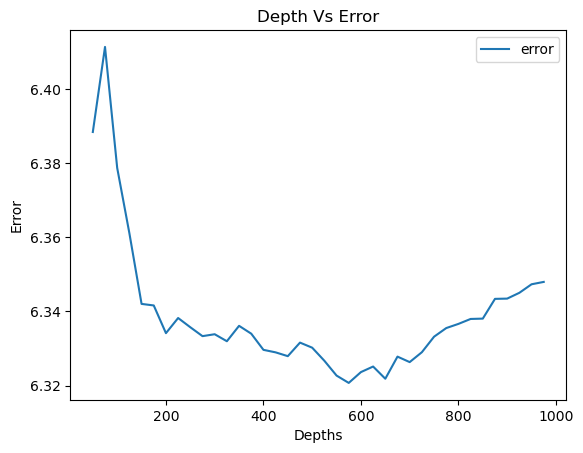

In [26]:
import matplotlib.pyplot as plt

plt.plot(trees, errors, label = "error")
plt.xlabel("Depths")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.title("Depth Vs Error")
plt.show()

In [40]:
model = RandomForestRegressor(n_estimators = 130, criterion='squared_error', max_depth =100, random_state=10, n_jobs = 10, verbose =1)
model.fit(X_train, y_train)


model.predict([[1034,1028,989.25,1018,5352057]])

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 130 out of 130 | elapsed:    0.7s finished
/opt/homebrew/Caskroom/miniforge/base/envs/streamlit_projects/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 130 out of 130 | elapsed:    0.0s finished


array([1030.46861291])

In [41]:
from source_files.load_data import load_data

In [46]:
load_data(tickers[0])